In [ ]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 10

# Create a list of tuples representing location coordinates -
# try to use a random number generator
# (x, y) could be between 0 and 100
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]


depot =(50,50) # Define the coordinates for the depot

num_vehicles = 5 # Define the number of vehicles - (eg 3)

In [ ]:
# TASK 3 - Genetic Algorithm Setup
# - Figure out how to represent an individual OR encode an individual
#creator.create("FitnessMin", )
#creator.create("Individual", )


# Define the fitness function as minimizing (e.g., total distance)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Define an individual as a list of integers representing location indices
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
#TASK 4 - Starting with the toolbox and tools
"""toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", #finish defining how to build an individual)
toolbox.register("population", #finish defining how to build an population)"""

# Create the toolbox
toolbox = base.Toolbox()

# Register a function to generate a random permutation of locations
toolbox.register("indices", random.sample, range(num_locations), num_locations)

# Register how to create an individual (a random permutation of locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)

# Register how to create a population (list of individuals)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# TODO: Task 5 - Write the fitness evaluation function
#              - Return (total distance, standard deviation)

def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation

    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        # Create the route for the vehicle
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = 0
        for k in range(len(vehicle_route) - 1):
            current_location = vehicle_route[k]
            next_location = vehicle_route[k + 1]
            vehicle_distance += ((current_location[0] - next_location[0])**2 +
                                 (current_location[1] - next_location[1])**2)**0.5

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    # Use standard deviation of distances as a penalty for imbalance among vehicles
    balance_penalty = np.std(distances)

    return total_distance, balance_penalty

In [ ]:
# Task 6
toolbox.register("evaluate", evalVRP)

In [ ]:

# TODO: Task 7 - Configure the genetic operators
"""toolbox.register("mate", # Choose and configure a crossover method)
toolbox.register("mutate", # Choose and configure a mutation method)
toolbox.register("select", # Choose and configure a selection method)"""

toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
def plot_routes(individual, title="Routes"):
    # Split the individual into routes for each vehicle
    routes = np.array_split(individual, num_vehicles)

    # Plot each route
    plt.figure(figsize=(10, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Different colors for each vehicle

    for i, route in enumerate(routes):
        # Get the locations for this route (add depot at the start and end)
        route_locations = [depot] + [locations[individual[j]] for j in route] + [depot]

        # Extract the x and y coordinates for plotting
        x_coords = [loc[0] for loc in route_locations]
        y_coords = [loc[1] for loc in route_locations]

        # Plot the route
        plt.plot(x_coords, y_coords, marker='o', color=colors[i % len(colors)], label=f"Vehicle {i+1}")

    # Plot depot separately for clarity
    plt.scatter(depot[0], depot[1], color='black', marker='D', s=100, label="Depot")

    # Labels and title
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

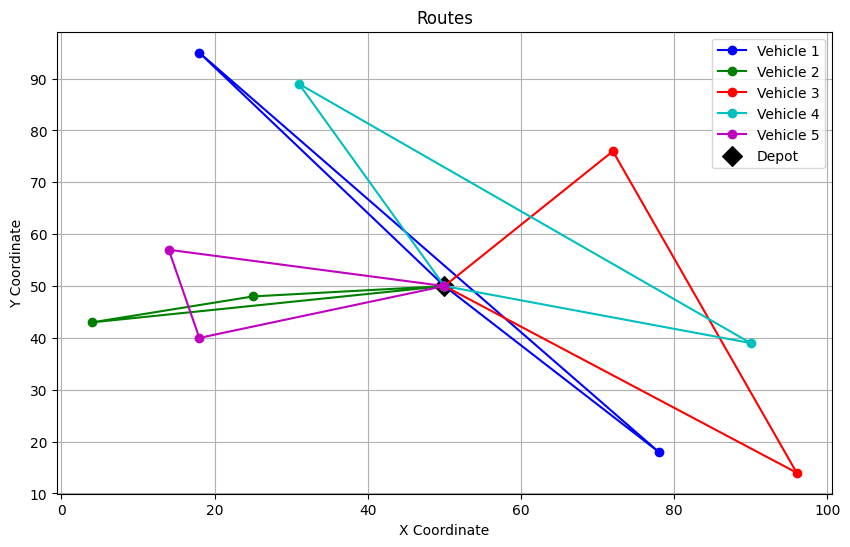

In [ ]:
plot_routes(toolbox.individual())

In [ ]:

# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [ ]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    # TODO: Task 9 - Call the main function, run the algorithm and print the results
    main()